In [12]:
#Time Series Forecasting 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [13]:
#Import dataset 
loadData = pd.read_csv("Downloads/X_Litmus/champagne.csv")

In [14]:
loadData.shape

(105, 2)

In [15]:
loadData.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [16]:
loadData['Month'] = pd.to_datetime(loadData['Month'])

In [17]:
loadData.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [18]:
loadData.set_index('Month', inplace = True)

In [19]:
loadData.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


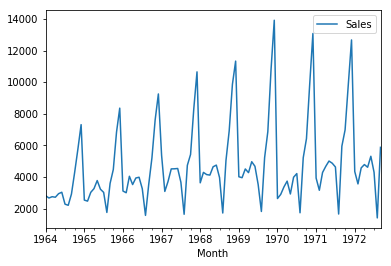

In [20]:
loadData.plot()

In [23]:
model = sm.tsa.statespace.SARIMAX(loadData['Sales'],order = (1,0,0),seasonal_order=(1,1,1,12))
results = model.fit()

/Users/punchh_gourav/Documents/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/punchh_gourav/Documents/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


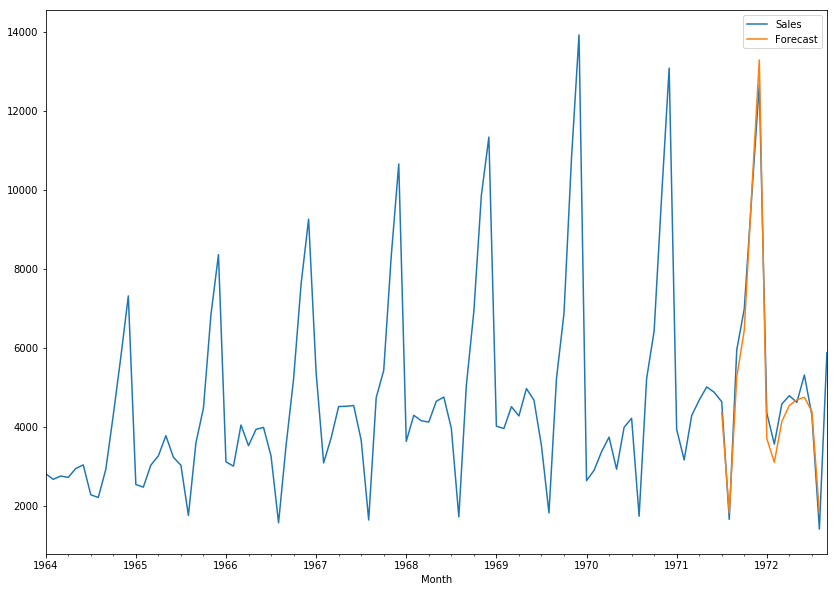

In [28]:
loadData['Forecast'] = results.predict(start = 90, end = 103, dynamic = True)
loadData[['Sales','Forecast']].plot(figsize = (14,10))

In [34]:
from pandas.tseries.offsets import DateOffset
futureDates = [loadData.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [35]:
futureDataset = pd.DataFrame(index = futureDates[1:], columns = loadData.columns)
futureDataset.head()

,Sales,Forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN


In [36]:
futureDataset.tail()

,Sales,Forecast
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN


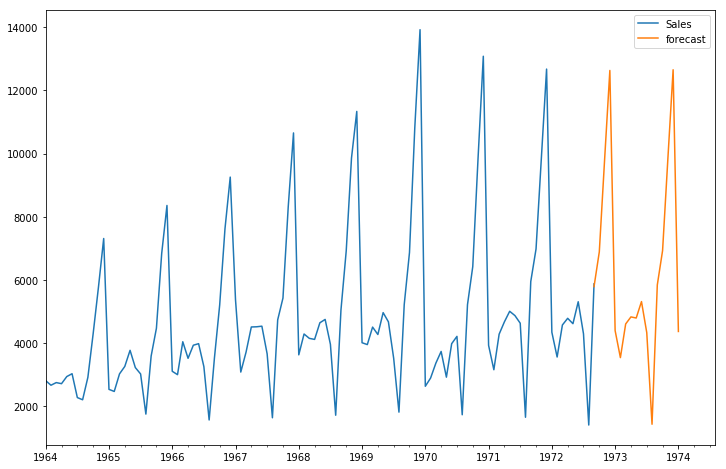

In [40]:
#Concating the Future dataset with Original dataset
newDataset = pd.concat([loadData,futureDataset])
newDataset['forecast'] = results.predict(start = 104, end = 120, dynamic = True)
newDataset[['Sales', 'forecast']].plot(figsize = (12, 8))